In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



# Define dataset path
data_dir = "./dataset"
categories = ["with_mask", "without_mask"]

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)

            # Check if the file is an image
            if not img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                print(f"Skipping non-image file: {img_name}")
                continue

            # print(f"Trying to read: {img_path}")
            img = cv2.imread(img_path)

            # if img is None:
            #     print(f"Failed to load: {img_path}")
            #     continue  # Skip unreadable images


            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Skipping unreadable image: {img_name}")
                continue

            img = cv2.resize(img, (64, 64))  # Resize to match CNN input
            data.append(img)
            labels.append(class_label)

        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Dataset successfully loaded!")
print(f"Total images loaded: {len(data)}")


2025-04-20 22:14:23.656572: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 22:14:23.657232: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 22:14:23.661554: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 22:14:23.671822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745167463.695440   74028 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745167463.70

Dataset successfully loaded!
Total images loaded: 3832


In [2]:
import psutil
import threading
import time
import matplotlib.pyplot as plt

cpu_data = []  # List of lists: Each sublist is one sample across all cores
monitoring = True

def monitor_all_cores():
    while monitoring:
        usage = psutil.cpu_percent(interval=1, percpu=True)
        cpu_data.append(usage)

# Start background monitoring
monitor_thread = threading.Thread(target=monitor_all_cores)
monitor_thread.start()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ─── Set thread parallelism BEFORE any TF operation ─────────────────────────────
tf.config.threading.set_intra_op_parallelism_threads(4)
tf.config.threading.set_inter_op_parallelism_threads(4)

# ─── Model definition ─────────────────────────────────────────────────────────
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")   # Two classes
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/home/ashish/Downloads/Face-Mask-Detection-master/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-20 22:14:33.457622: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.7414 - loss: 0.5010 - val_accuracy: 0.9413 - val_loss: 0.1902
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9202 - loss: 0.2280 - val_accuracy: 0.9387 - val_loss: 0.1802
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9440 - loss: 0.1790 - val_accuracy: 0.9505 - val_loss: 0.1636
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9468 - loss: 0.1583 - val_accuracy: 0.9622 - val_loss: 0.1299
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9599 - loss: 0.1265 - val_accuracy: 0.9622 - val_loss: 0.1111
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9503 - loss: 0.1382 - val_accuracy: 0.9609 - val_loss: 0.1102
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9558 - loss: 0.1164 - val_accuracy: 0.9700 - val_loss: 0.1045
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9708 - loss: 0.0812 - val_accuracy: 0.9583 - v

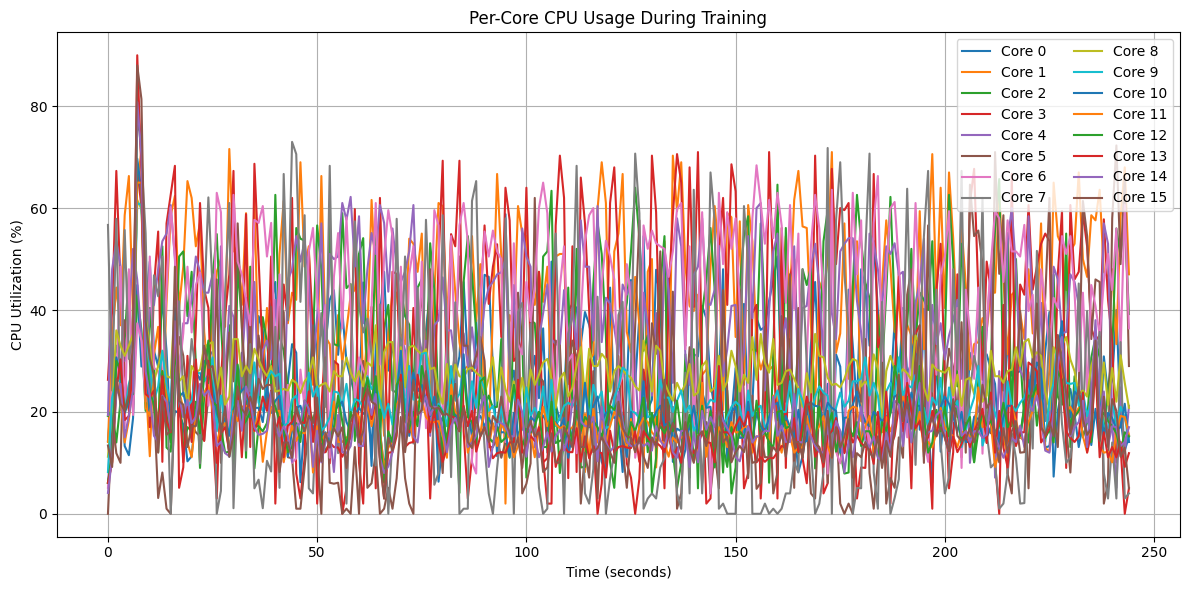

In [4]:
# ─── Train ──────────────────────────────────────────────────────────────────────
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

# Stop monitoring
monitoring = False
monitor_thread.join()

# Transpose the list to get usage per core
cpu_data = list(map(list, zip(*cpu_data)))  # Transpose

# Plot
plt.figure(figsize=(12, 6))
for i, core_usage in enumerate(cpu_data):
    plt.plot(core_usage, label=f'Core {i}')
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Utilization (%)')
plt.title('Per-Core CPU Usage During Training')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:

# ─── Save ───────────────────────────────────────────────────────────────────────
model.save("mask_detector_model.h5")
print("Model training complete and saved to mask_detector_model.h5")


Model training complete and saved to mask_detector_model.h5
